In [379]:
import glob
import numpy as np
import pandas as pd
import sys
import os
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
from random import sample


import cv2
from pytorchyolo import detect, models
import matplotlib.pyplot as plt
import numpy as np
# Load the YOLO model
model = models.load_model(
  "./yolov3-custom.cfg", 
  "./checkpoints512.pth")
import glob
from Classification.Heme_classifer import DeepHeme
from tqdm import tqdm
import os
import pandas as pd
from Visualization.Draw_box_dots import drawer
len(glob.glob('../AWS/WSI_patches/1102620210134511_tiles_files/*'))

/home/aa-ssun2-cmp/anaconda3/envs/heme_seg/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


./yolov3-custom.cfg
./yolov3-custom.cfg
did you get activated?
length of model list
107


53568

In [30]:
image_names  = [x.split('/')[-1] for x in glob.glob('../AWS/WSI_patches/1102620210134511_tiles_files/*')]

In [31]:
x_list = []
y_list = []
for _names in image_names:
    x_list.append(int(_names.split('_')[0]))
    y_list.append(int(_names.split('_')[1].split('.')[0]))

In [32]:
max(x_list)

287

In [33]:
max(y_list)

185

In [34]:
canvas = np.zeros((185*10, 287*10,3)).astype('uint8')

In [36]:

for x in tqdm(range(185)):
    for y in range(287):
        img = Image.open('../AWS/WSI_patches/1102620210134511_tiles_files/'+str(y)+'_'+str(x)+'.jpeg')
        canvas[x*10:(x+1)*10,
              y*10:(y+1)*10,:] = np.array(img.resize((10,10)))


100%|██████████| 185/185 [07:15<00:00,  2.35s/it]


In [44]:
orig_image = canvas.copy()

In [46]:
orig_image.shape

(1850, 2870, 3)

([], [])

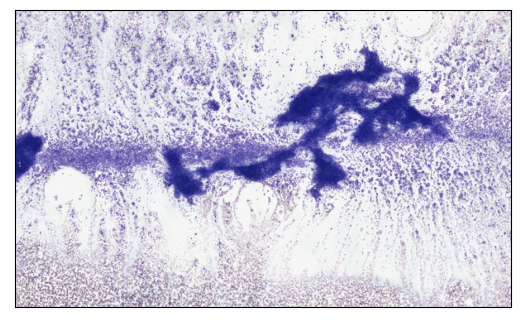

In [49]:
plt.imshow(orig_image[850:1210, 1200:1800])
plt.xticks([])
plt.yticks([])

In [377]:
x_lists = []
y_lists = []
for y in list(range(15,355,50)):
    for x in list(range(15,600-5,50)):
        x_lists.append(x)
        y_lists.append(y)


In [395]:
ratio

[0.0,
 0.5,
 1.0,
 0,
 0,
 0.3333333333333333,
 1.0,
 0,
 0,
 0,
 0.0,
 0,
 0,
 1.0,
 0.2,
 0,
 0.8333333333333334,
 0.0,
 0,
 0,
 0,
 0.0,
 0.3,
 0.25,
 0.8571428571428571,
 1.0,
 0.0,
 0,
 0.0,
 0.25,
 0,
 0.0,
 0.0,
 0,
 0,
 0.6666666666666666,
 0,
 0.2727272727272727,
 0.4,
 0.0,
 0.4444444444444444,
 0.3,
 0.21428571428571427,
 0.0,
 0.125,
 0.14285714285714285,
 0.75,
 0.0,
 0.0,
 0,
 0.6666666666666666,
 0.0,
 0,
 0,
 0.2857142857142857,
 0.2857142857142857,
 0.3,
 0.3333333333333333,
 0.5,
 0.6363636363636364,
 0.5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0.5,
 0,
 0.0,
 0.5,
 0,
 0.5,
 0,
 0,
 0,
 0,
 0,
 0]

In [392]:
len(crop_x_lists)

84

In [408]:
heatmap_dics.keys()

dict_keys([(95, -5), (105, -5), (115, -5), (125, -5), (135, -5), (95, 5), (105, 5), (115, 5), (125, 5), (135, 5), (95, 15), (105, 15), (115, 15), (125, 15), (135, 15), (95, 25), (105, 25), (115, 25), (125, 25), (135, 25), (95, 35), (105, 35), (115, 35), (125, 35), (135, 35), (295, -5), (305, -5), (315, -5), (325, -5), (335, -5), (295, 5), (305, 5), (315, 5), (325, 5), (335, 5), (295, 15), (305, 15), (315, 15), (325, 15), (335, 15), (295, 25), (305, 25), (315, 25), (325, 25), (335, 25), (295, 35), (305, 35), (315, 35), (325, 35), (335, 35), (45, 45), (55, 45), (65, 45), (75, 45), (85, 45), (45, 55), (55, 55), (65, 55), (75, 55), (85, 55), (45, 65), (55, 65), (65, 65), (75, 65), (85, 65), (45, 75), (55, 75), (65, 75), (75, 75), (85, 75), (45, 85), (55, 85), (65, 85), (75, 85), (85, 85), (195, 45), (205, 45), (215, 45), (225, 45), (235, 45), (195, 55), (205, 55), (215, 55), (225, 55), (235, 55), (195, 65), (205, 65), (215, 65), (225, 65), (235, 65), (195, 75), (205, 75), (215, 75), (225, 

([], [])

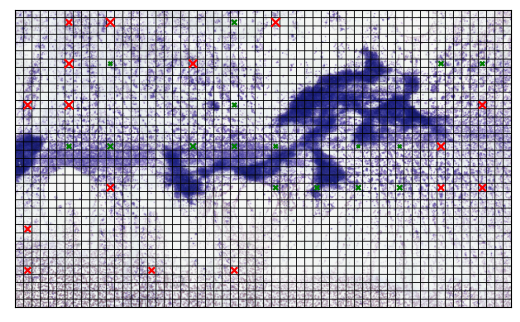

In [396]:
ratio = list(dics.values())
colors = ['green' if x <0.5 else 'red' for x in ratio]
crop_x_lists = []
crop_y_lists = []
for y in list(range(15,355,50)):
    for x in list(range(15,600-5,50)):
        crop_x_lists.append(x)
        crop_y_lists.append(y)
        
dx, dy = 10,10

# Custom (rgb) grid color
grid_color = [0,0,0]
canvas_cropped = orig_image[850:1210, 1200:1800]
# Modify the image to include the grid
canvas_cropped[:,::dy,:] = grid_color
canvas_cropped[::dx,:,:] = grid_color

plt.scatter(crop_x_lists, crop_y_lists, marker="x", color=colors, s=[40*x for x in ratio])
plt.imshow(canvas_cropped)
plt.xticks([])
plt.yticks([])

In [410]:
heatmap_x = []
heatmap_y = []
for (x,y) in heatmap_dics.keys():
    heatmap_x.append(x)
    heatmap_y.append(y)

In [418]:
min(heatmap_x)

-5

In [424]:
heatmap = np.zeros((36,60))
for (x,y) in heatmap_dics.keys():
    heatmap[int((y-5)/10), int((x-5)/10)] = heatmap_dics[(x,y)]

([], [])

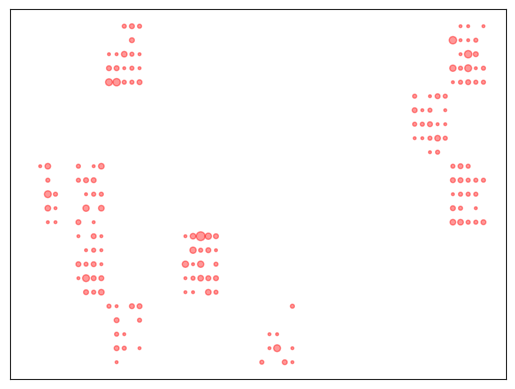

In [442]:

 
# Change color with c and alpha
plt.scatter(heatmap_x, heatmap_y, s=[x*4 for x in heatmap_dics.values()], c="red", alpha=0.4)
plt.xticks([])
plt.yticks([])

([], [])

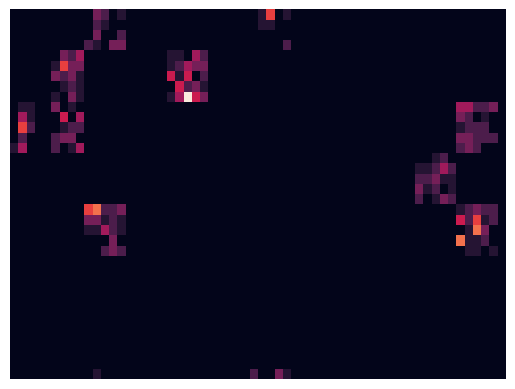

In [428]:
import seaborn as sns
sns.heatmap(heatmap,cbar=False)
plt.xticks([])
plt.yticks([])

In [438]:
z = 

0

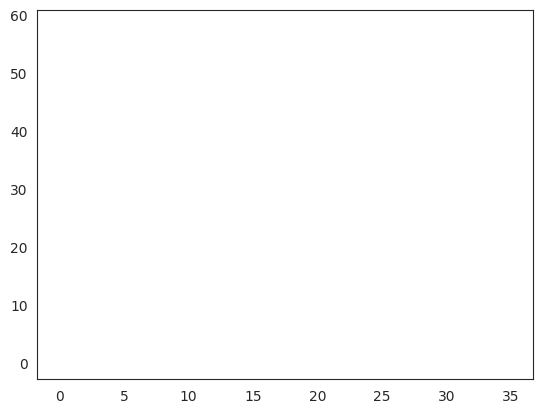

In [437]:
plt.scatter(y1, y2, s=z*4000, c="red", alpha=0.4)

In [431]:
y1 = np.array([])
y2 = np.array([])

#create locations
for i in range(1,int(heatmap.max()+1)):
    for j in range(i):
        locs = np.where(heatmap==i)
        try:
            y1 = np.append(y1, locs[0])
            y2 = np.append(y2, locs[1])
        except: #this number doesn't exist in the array
            break

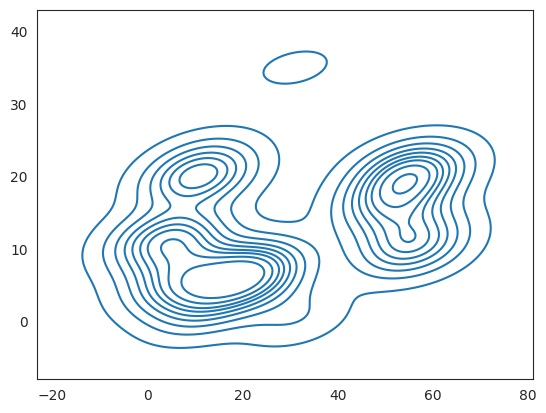

In [436]:
sns.set_style("white")

# Basic 2D density plot
sns.kdeplot(x=y2, y=y1)
plt.show()

/tmp/ipykernel_26688/2223437624.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=y1, y=y2, cmap="Reds", shade=True, bw_adjust=.5)


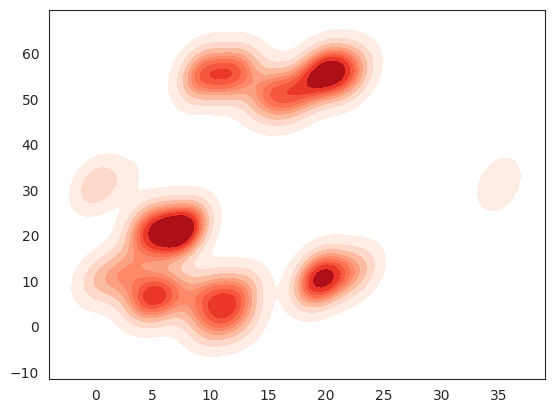

In [435]:
# Custom the color, add shade and bandwidth
sns.kdeplot(x=y1, y=y2, cmap="Reds", shade=True, bw_adjust=.5)
plt.show()

In [416]:
canvas_cropped.shape

(360, 600, 3)

([], [])

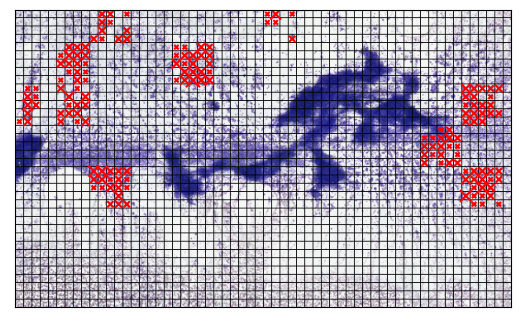

In [413]:
nums = list(heatmap_dics.values())
dx, dy = 10,10

# Custom (rgb) grid color
grid_color = [0,0,0]
canvas_cropped = orig_image[850:1210, 1200:1800]
# Modify the image to include the grid
canvas_cropped[:,::dy,:] = grid_color
canvas_cropped[::dx,:,:] = grid_color

plt.scatter(heatmap_x, heatmap_y, marker="x", color='red', s=[10*x for x in nums])
plt.imshow(canvas_cropped)
plt.xticks([])
plt.yticks([])

In [402]:
from tqdm import tqdm

In [405]:
len(ratio)

84

In [407]:
heatmap_dics = {}
for (x,y,z) in zip(crop_x_lists, crop_y_lists, ratio):
    if z>0.5:
        x_cor = 1200+x -5
        y_cor = 850 +y -5
        for _y in range(y_cor-20,y_cor+30,10):
            for _x in range(x_cor-20,x_cor+30,10):
                image = cv2.imread('../AWS/WSI_patches/1102620210134511_tiles_files/'+str(int(_x/10))+\
              '_'+str(int(_y/10)) +'.jpeg')
                
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                os.system('rm -rf ./Classification/outputs')
                boxes = detect.detect_image(model, image, conf_thres=0.1, nms_thres=0.1)
                try:
                    res_df = DeepHeme(img = image,
                                boxes = boxes,
                               save_dir ='./Classification/' )
                    res_df_sub = res_df[res_df['prediction'].isin(['M1', 'M2', 'ER1','MO2'])]
                    heatmap_dics[(_x+5-1200, _y+5 - 850)] = res_df_sub.shape[0]
                except:
                    heatmap_dics[(_x+5-1200, _y+5 - 850)] = 0
                
        

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


In [ ]:
color 

In [381]:
x_lists = []
y_lists = []
for y in list(range(850+15,850+355,50)):
    for x in list(range(1200+15,1200+600-5,50)):
        x_lists.append(x-5)
        y_lists.append(y-5)
dics = {}
for (x,y) in zip(x_lists, y_lists):
    image = cv2.imread('../AWS/WSI_patches/1102620210134511_tiles_files/'+str(int(x/10))+\
              '_'+str(int(y/10)) +'.jpeg')
    

    # Convert OpenCV bgr to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    os.system('rm -rf ./Classification/outputs')
    boxes = detect.detect_image(model, image, conf_thres=0.1, nms_thres=0.1)
    try:
        res_df = DeepHeme(img = image,
                            boxes = boxes,
                           save_dir ='./Classification/' )
    except:
        res_df = res_df.loc[:-1]
        
    res_df = res_df[~res_df['prediction'].isin(['U1', 'PL2', 'PL3'])]
    if res_df.shape[0] == 0:
        dics[(x+5-1200, y+5 - 850)] = 0
    else:
        res_df_sub = res_df[res_df['prediction'].isin(['M1', 'M2', 'ER1','MO2'])]
        dics[(x+5-1200, y+5 - 850)] = res_df_sub.shape[0]/res_df.shape[0]

        
    

    
        


/home/aa-ssun2-cmp/anaconda3/envs/heme_seg/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!
Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


[0.0,
 0.5,
 1.0,
 0,
 0,
 0.3333333333333333,
 1.0,
 0,
 0,
 0,
 0.0,
 0,
 0,
 1.0,
 0.2,
 0,
 0.8333333333333334,
 0.0,
 0,
 0,
 0,
 0.0,
 0.3,
 0.25,
 0.8571428571428571,
 1.0,
 0.0,
 0,
 0.0,
 0.25,
 0,
 0.0,
 0.0,
 0,
 0,
 0.6666666666666666,
 0,
 0.2727272727272727,
 0.4,
 0.0,
 0.4444444444444444,
 0.3,
 0.21428571428571427,
 0.0,
 0.125,
 0.14285714285714285,
 0.75,
 0.0,
 0.0,
 0,
 0.6666666666666666,
 0.0,
 0,
 0,
 0.2857142857142857,
 0.2857142857142857,
 0.3,
 0.3333333333333333,
 0.5,
 0.6363636363636364,
 0.5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0.5,
 0,
 0.0,
 0.5,
 0,
 0.5,
 0,
 0,
 0,
 0,
 0,
 0]

[5, 55, 105, 155, 205, 255, 305, 355, 405, 455, 505, 555]

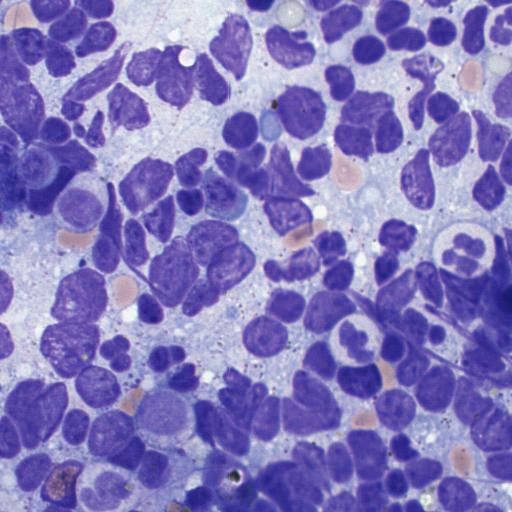

In [367]:
#image_names_50 = sample(image_names,1)
for i in image_names_50:
    img = Image.open('./data/pre_selected_patches/1102620210134511/128_102.jpeg')
    break
    
img

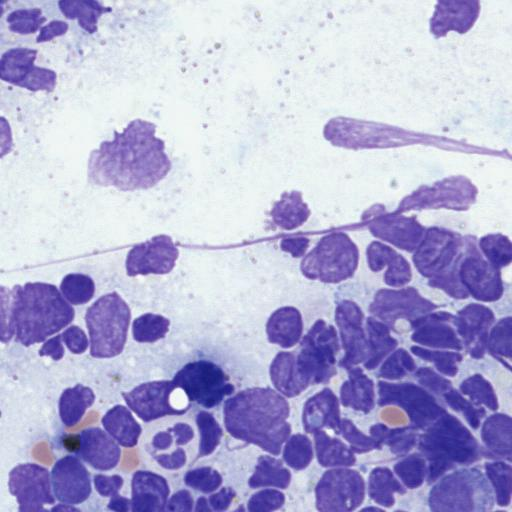

([], [])

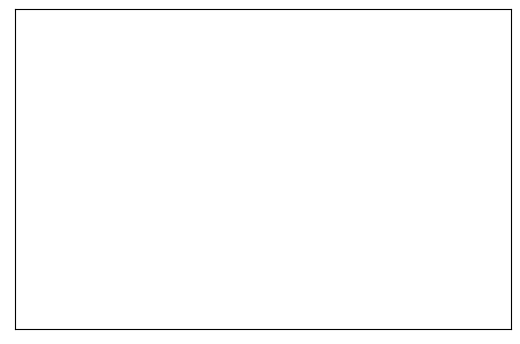

In [43]:
canvas_background = np.ones((185*10, 287*10,3)).astype('uint8')*255

plt.imshow(canvas_background)
plt.xticks([])
plt.yticks([])

In [13]:
117*512

59904

In [14]:
67*518

34706

In [12]:
67*117

7839